Previsão de rotatividade de clientes bancários

In [5]:
#Importando os pacotes necessáriosl

import kaggle as kg
import pandas as pd
import numpy as np
import os

import requests
import zipfile
import warnings

warnings.filterwarnings('ignore')

In [6]:
#Autenticação no portal Kaggle
kg.api.authenticate()

In [7]:
kg.api.dataset_download_files('saurabhbadole/bank-customer-churn-prediction-dataset',
                             path = r'C:\Users\eduardo.sepulveda\.kaggle',
                             unzip = True)

Dataset URL: https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset


In [8]:
#Verificando os arquivos na pasta .\kaggle
os.listdir(r'C:\Users\eduardo.sepulveda\.kaggle')

['Churn_Modelling.csv',
 'Credit card transactions - India - Simple.csv',
 'creditcard.csv',
 'kaggle.json']

In [11]:
#Carregando a base de dados
df = pd.read_csv(r'C:\Users\eduardo.sepulveda\.kaggle\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


__Features:__

RowNumber: The sequential number assigned to each row in the dataset.
CustomerId: A unique identifier for each customer

Surname: The surname of the customr.

CreditScore: The credit score of the custmer.

Geography: The geographical location of the customer (e.g., country or rgion).

Gender: The gender of the ustomer.

Age: The age of th customer.

Tenure: The number of years the customer has been wth the bank.

Balance: The account balance o the customer.

NumOfProducts: The number of bank products he customer has.

HasCrCard: Indicates whether the customer has a credit car (binary: yes/no).

IsActiveMember: Indicates whether the customer is an active memer (binary: yes/no).

EstimatedSalary: The estimated alary of the customer.

Exited: Indicates whether the customer has exited based on the given features.

In [12]:
#Eliminando as colunas que não são necessárias para o modelo
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Converta dados categóricos em dados numéricos
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

#Dimensionando os dados numéricos
scaler = StandardScaler()
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.fit_transform(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1
1,-0.440036,2,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0
2,-1.536794,0,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1
3,0.501521,0,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0
4,2.063884,2,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0


In [18]:
# Summary statistics
df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,-4.824585e-16,0.746300,0.545700,2.318146e-16,-1.078249e-16,-6.252776e-17,1.634248e-17,0.70550,0.515100,-2.877698e-17,0.203700
std,1.000050e+00,0.827529,0.497932,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.45584,0.499797,1.000050e+00,0.402769
min,-3.109504e+00,0.000000,0.000000,-1.994969e+00,-1.733315e+00,-1.225848e+00,-9.115835e-01,0.00000,0.000000,-1.740268e+00,0.000000
25%,-6.883586e-01,0.000000,0.000000,-6.600185e-01,-6.959818e-01,-1.225848e+00,-9.115835e-01,0.00000,0.000000,-8.535935e-01,0.000000
50%,1.522218e-02,0.000000,1.000000,-1.832505e-01,-4.425957e-03,3.319639e-01,-9.115835e-01,1.00000,1.000000,1.802807e-03,0.000000
75%,6.981094e-01,1.000000,1.000000,4.842246e-01,6.871299e-01,8.199205e-01,8.077366e-01,1.00000,1.000000,8.572431e-01,0.000000
max,2.063884e+00,2.000000,1.000000,5.061197e+00,1.724464e+00,2.795323e+00,4.246377e+00,1.00000,1.000000,1.737200e+00,1.000000


In [36]:
#Contagem da quantidade de registros que temos em cada uma das classes
np.unique(df['Exited'], return_counts = True)

(array([0, 1], dtype=int64), array([7963, 2037], dtype=int64))

In [38]:
#Porcentagem da quantidade de registros que temos em cada uma das classes
round(df['Exited'].value_counts(normalize=True)*100,2)

0    79.63
1    20.37
Name: Exited, dtype: float64

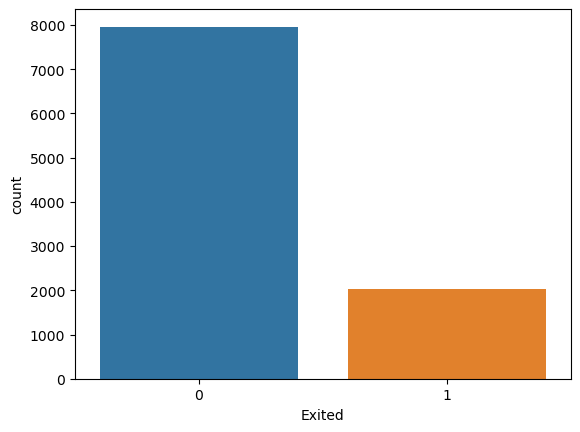

In [35]:
#Representação gráfica das classes
import seaborn as sns

sns.countplot(x = df["Exited"]);

                 CreditScore  Geography    Gender       Age    Tenure  \
CreditScore         1.000000   0.007888 -0.002857 -0.003965  0.000842   
Geography           0.007888   1.000000  0.004719  0.022812  0.003739   
Gender             -0.002857   0.004719  1.000000 -0.027544  0.014733   
Age                -0.003965   0.022812 -0.027544  1.000000 -0.009997   
Tenure              0.000842   0.003739  0.014733 -0.009997  1.000000   
Balance             0.006268   0.069408  0.012087  0.028308 -0.012254   
NumOfProducts       0.012238   0.003972 -0.021859 -0.030680  0.013444   
HasCrCard          -0.005458  -0.008523  0.005766 -0.011721  0.022583   
IsActiveMember      0.025651   0.006724  0.022544  0.085472 -0.028362   
EstimatedSalary    -0.001384  -0.001369 -0.008112 -0.007201  0.007784   
Exited             -0.027094   0.035943 -0.106512  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
CreditScore      0.006268       0.012238  -0.005458 

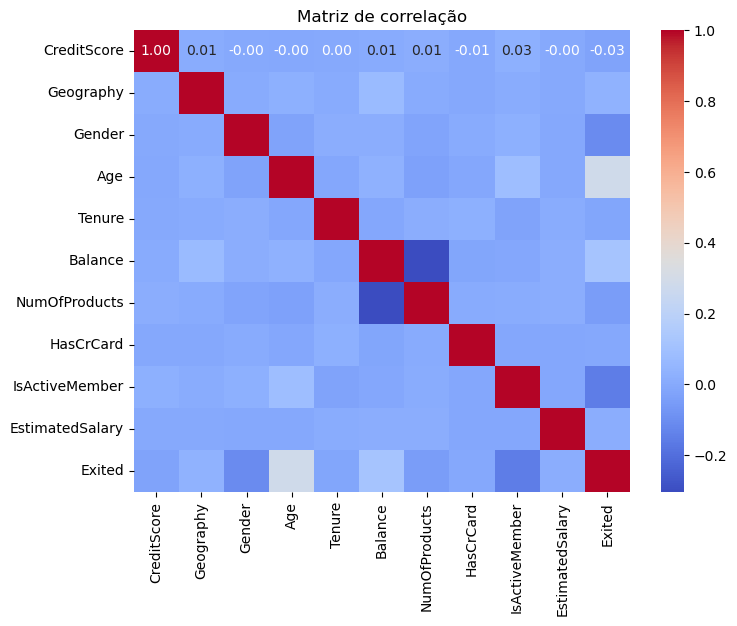

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

#Matriz de correlação
correlation_matrix = df.corr()
print(correlation_matrix)
print()

#Mapa de calor para correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlação")

plt.show()

In [28]:
#Imprime informações sobre um DataFrame, incluindo o tipo de índice e colunas, valores não nulos e uso de memória.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  float64
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(6), int32(2), int64(3)
memory usage: 781.4 KB


In [30]:
#Divisão entre previsores e classes
X_data = df.iloc[:, 0:10]
X_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886
1,-0.440036,2,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534
2,-1.536794,0,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687
3,0.501521,0,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918
4,2.063884,2,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276


In [31]:
y_data = df.iloc[:,10]
y_data.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

#Separando a base de dados utilizando a técnica hold-out
X_train,X_test,y_train,y_test=train_test_split(X_data, y_data,test_size=0.2,random_state=42)

In [33]:
#Visualizando a divisão da base de dados
print(X_train.shape, X_test.shape)

(8000, 10) (2000, 10)


In [46]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier()

#Treinando o modelo
sgdc.fit(X_train, y_train)

# Fazendo previsões
pred_sgdc = sgdc.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, pred_sgdc))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



In [50]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Treinando o modelo
gnb.fit(X_train, y_train)

# Fazendo previsões
pred_gnb = gnb.predict(X_test)

# Calculando a acurácia do modelo
print(classification_report(y_test, pred_gnb))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1607
           1       0.68      0.24      0.35       393

    accuracy                           0.83      2000
   macro avg       0.76      0.61      0.63      2000
weighted avg       0.81      0.83      0.79      2000



In [51]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

# Treinando o modelo
gbc.fit(X_train, y_train)

# Fazendo previsões
pred_gbc = gbc.predict(X_test)

# Calculando a acurácia do modelo
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [52]:
from sklearn.svm import SVC

svc = SVC()

# Treinando o modelo
svc.fit(X_train, y_train)

# Fazendo previsões
pred_svc = svc.predict(X_test)

# Calculando a acurácia do modelo
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.80      0.37      0.50       393

    accuracy                           0.86      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.85      0.86      0.84      2000



In [53]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

# Treinando o modelo
knc.fit(X_train, y_train)

# Fazendo previsões
pred_knc = svc.predict(X_test)

# Calculando a acurácia do modelo
print(classification_report(y_test, pred_knc))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.80      0.37      0.50       393

    accuracy                           0.86      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.85      0.86      0.84      2000



>> O modelo Gradient Boosting Classifier teve o melhor desempenho com uma precisão de 87%. Isto sugere que este modelo foi capaz de generalizar bem a partir dos dados de treinamento e prever com precisão os resultados nos dados de teste.
>> 
Os modelos Support Vector Classifier e K-Nearest Neighbours também apresentaram altas pontuações de precisão de860%, respectivamente, indicando que eles também foram eficazes em suas previsões

>> 
O modelo dSGDClassifierca teve uma precisão decente d8055%, mas foi superado pelos outros modelos, exceto pelGaussianNBão.
O modeGaussianNBsão teve a menor precisão 80,30%, sugerindo que pode não ter sido tão eficaz em suas previsões em comparação aos demais modelos.

Verificando o O modelo Gradient Boosting Classifier

In [57]:
from sklearn.metrics import confusion_matrix

# Matriz de confusão
cf_matrix = confusion_matrix(y_test, pred_gbc)
cf_matrix

array([[1547,   60],
       [ 209,  184]], dtype=int64)

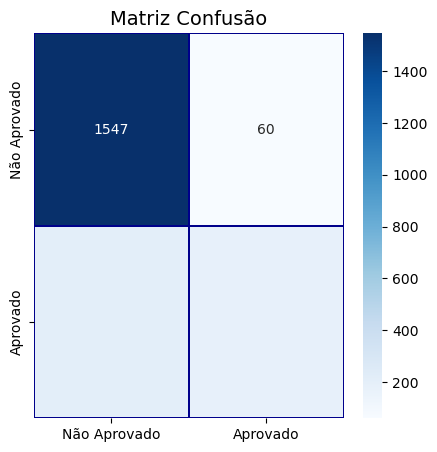

In [58]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cf_matrix, 
            xticklabels=['Não Aprovado', 'Aprovado'],
            yticklabels=['Não Aprovado', 'Aprovado'],
            fmt='d',
            annot=True,
            ax = ax1,
            linewidths=.2,
            linecolor="Darkblue",
            cmap="Blues")

plt.title('Matriz Confusão', fontsize=14)
plt.show()

In [59]:
#Salvando o modelo Gradient Boosting Classifier para as previsões
import joblib
joblib.dump(sgdc, "pred_gbc.pkl")
print("Arquivo gravado com Sucesso")

Arquivo gravado com Sucesso
